In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from datasist.model import get_regression_report





from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit, cross_val_score


import joblib

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('health_costs.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
for col in df.columns:
    print(f'For Column {col} \n---------------------------------\n')
    print(df[col].value_counts())
    print('\n')

For Column age 
---------------------------------

18    69
19    68
20    29
51    29
45    29
46    29
47    29
48    29
50    29
52    29
28    28
54    28
21    28
27    28
26    28
49    28
25    28
24    28
23    28
22    28
53    28
42    27
44    27
43    27
41    27
40    27
31    27
30    27
29    27
56    26
34    26
33    26
32    26
57    26
55    26
35    25
59    25
58    25
36    25
39    25
38    25
37    25
60    23
61    23
62    23
63    23
64    22
Name: age, dtype: int64


For Column sex 
---------------------------------

male      676
female    662
Name: sex, dtype: int64


For Column bmi 
---------------------------------

32.300    13
28.310     9
30.800     8
34.100     8
28.880     8
          ..
44.745     1
26.070     1
27.300     1
37.715     1
29.200     1
Name: bmi, Length: 548, dtype: int64


For Column children 
---------------------------------

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


For Column smoker 
--

In [5]:
df['charges']=round(df['charges'],0)
df['charges']=df['charges'].apply(int)
df['bmi']=round(df['bmi'],1)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16885
1,18,male,33.8,1,no,southeast,1726
2,28,male,33.0,3,no,southeast,4449
3,33,male,22.7,0,no,northwest,21984
4,32,male,28.9,0,no,northwest,3867


# Data Visualization

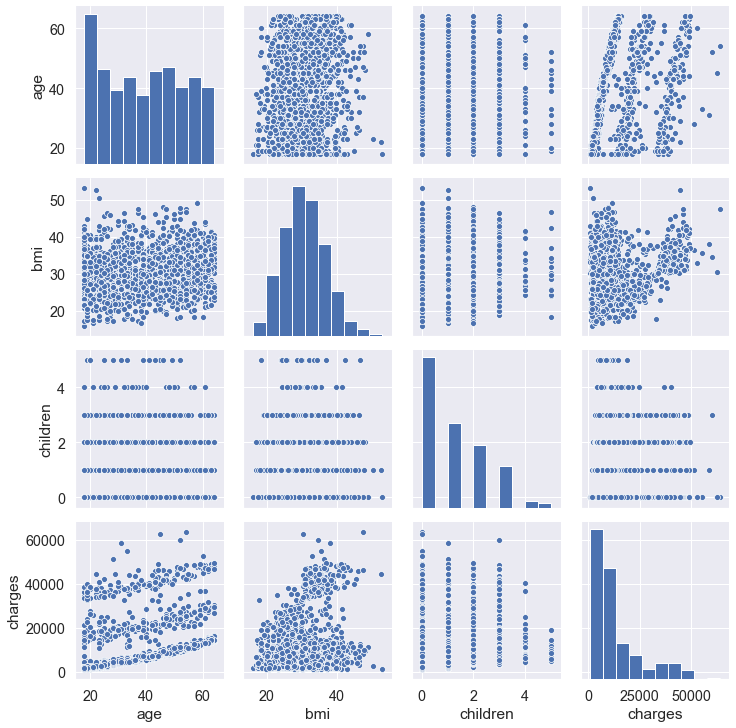

In [6]:
sns.pairplot(df)

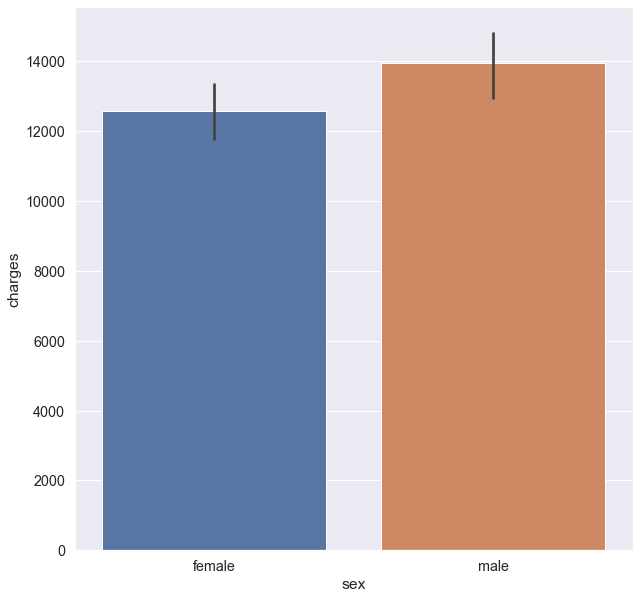

In [7]:
sns.barplot(df.sex,df.charges)

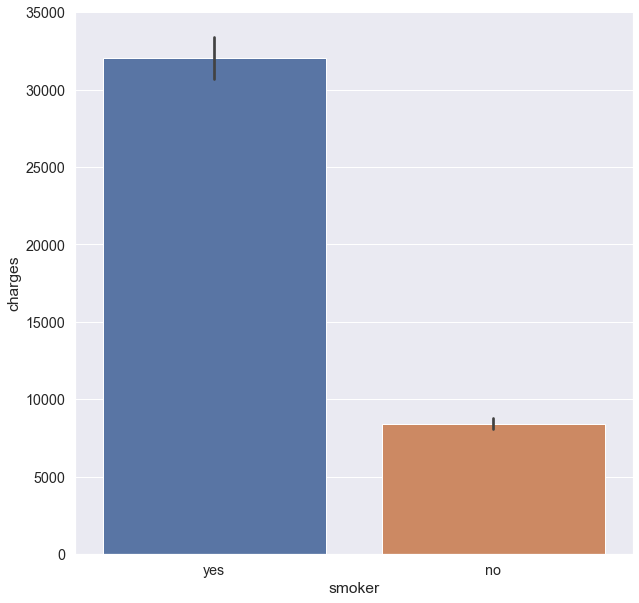

In [8]:
sns.barplot(df.smoker,df.charges)

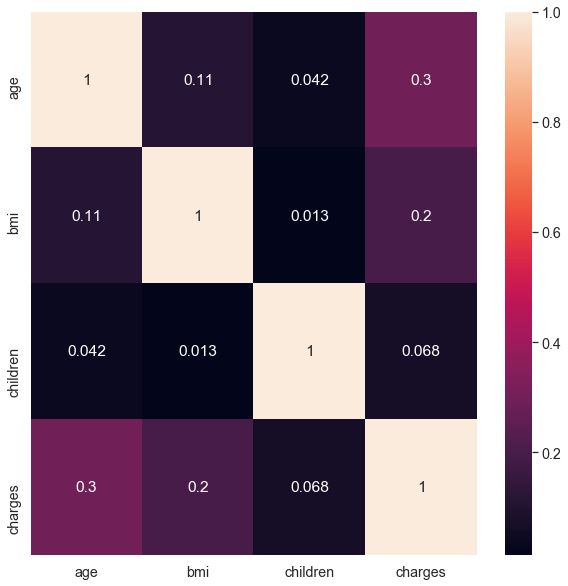

In [9]:
sns.heatmap(df.corr(),annot=True)

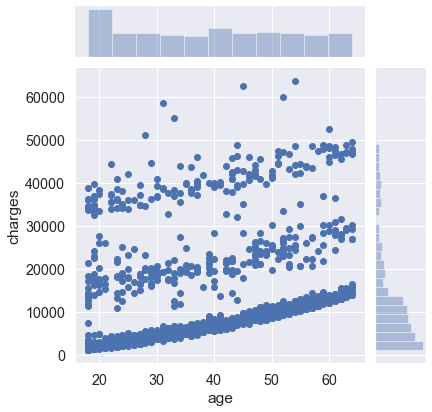

In [10]:
sns.jointplot(df.age,df.charges,kind='scatter',cmap='viridis')

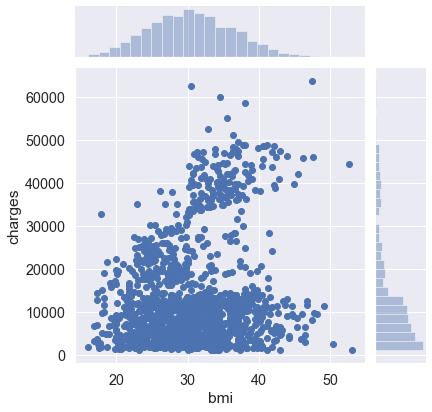

In [11]:
sns.jointplot(df.bmi,df.charges,kind='scatter',cmap='viridis')

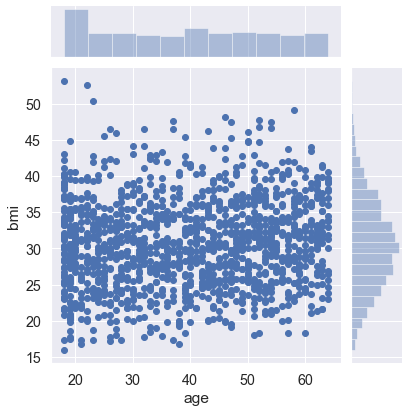

In [12]:
sns.jointplot(df.age,df.bmi,kind='scatter',cmap='viridis')

# Outlier Detection and Handling

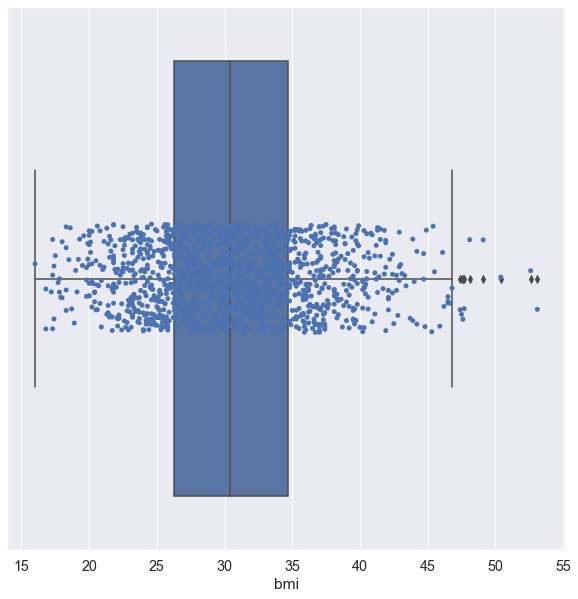

In [13]:
sns.boxplot(x='bmi',data=df)
sns.stripplot(x='bmi',data=df)

### As seen from the above plot of the bmi, that there are outliers present. We will not remove them as bmi= weight/height, which means weight is a factor affecting the hospitalization cost. Weight shows if a person is overweight which might be an indication that he/she is healthy.

# Data Presprocessing

In [14]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Nominal Features: sex, smoker,region,

In [15]:
df=pd.get_dummies(df,columns=['sex','smoker','region'],drop_first=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16885,0,1,0,0,1
1,18,33.8,1,1726,1,0,0,1,0
2,28,33.0,3,4449,1,0,0,1,0
3,33,22.7,0,21984,1,0,1,0,0
4,32,28.9,0,3867,1,0,1,0,0


# Feature Scaling

In [16]:
scaler = StandardScaler()

X = df.drop('charges', axis=1)
y = df['charges']

columns=['age','bmi']
scaler.fit(X[columns])
X[columns] = scaler.transform(X[columns])
joblib.dump(scaler,'standard_scaler.h5')

['standard_scaler.h5']

# Model Selection

In [17]:
def find_best_model_using_gridsearchcv(X,y):
    
    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'fit_intercept':[True,False]
            }
        },
        'k_nearest_neighbors':{
            'model':KNeighborsRegressor(),
        'params':{
            'n_neighbors':[3,4,5,6,7,8,9,10],
            'weights':['uniform','distance']
          }
        },
        'support_vector_regressor':{
            'model':SVR(),
            'params':{
                'gamma':['scale','auto'],
                'C':[0.1,1,10,100]
            }
        },
        'random_forest':{
            'model':RandomForestRegressor(),
            'params':{
               'n_estimators':[10,50,100,500,1000],
                'criterion':['mse','mae']
            }
        },
        'xgb':{
            'model':XGBRegressor(),
            'params':{
               
            }
        }
    }
    
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=10)
    for algo_name,config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
        
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [18]:
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.737948,{'fit_intercept': True}
1,k_nearest_neighbors,0.645630,"{'n_neighbors': 4, 'weights': 'distance'}"
2,support_vector_regressor,0.026779,"{'C': 100, 'gamma': 'scale'}"
3,random_forest,0.824169,"{'criterion': 'mse', 'n_estimators': 50}"
4,xgb,0.798077,{}


## As seen from the table produced, the best model is the Random Forest Regressor with an accuracy of 82.4% with a criterion of mse and n_estimators 50

In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)



model=RandomForestRegressor(criterion='mse',n_estimators=500)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [20]:
print(metrics.r2_score(ytest,ypred))

0.8625696564874735


In [21]:
r2 = metrics.r2_score(ytest,ypred)
N=ytest.shape[0]
p=2
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.8615324463477563


Mean Absolute Error:  2587.71138
Mean Squared Error:  21335816.42948
Mean Squared Log Error:  0.19744
R-squared Error:   0.86257
****************************************************************************************************


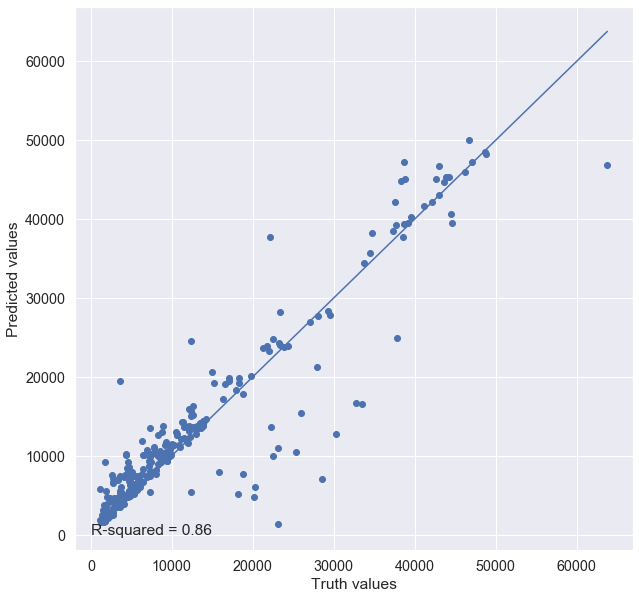

In [22]:
get_regression_report(ytest,ypred)

In [23]:
joblib.dump(model,'model.h5')

['model.h5']

# Function to predict

In [24]:
X.columns

Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [25]:
def predict_hc(age,sex,bmi,children,smoker,region):
    
    if(sex.lower()=='male'):
        sex_male=1
    else:
        sex_male=0
        
        
    if(smoker.lower()=='yes'):
        
        smoker_yes=1
    else:
        
        smoker_yes=0
        
        
    if(region.lower()=='southeast'):
        
        region_northwest=0
        region_southeast=1
        region_southwest=0
        
    elif(region.lower()=='southwest'):
        region_northwest=0
        region_southeast=0
        region_southwest=1
               
    elif(region.lower()=='northwest'):
        region_northwest=1
        region_southeast=0
        region_southwest=0
        
               
    else:
        region_northwest=0
        region_southeast=0
        region_southwest=0
        
    
    scaler.transform([[age,bmi]])
    
    int_features=np.array([age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest])
    final_features= int_features.reshape(1,-1)
    
    health_costs=int(round(model.predict(final_features)[0],0))
    
    return(f'Health costs are {health_costs} EGP')

In [26]:
predict_hc(25,'Male',30,0,'NO','NorthEast')

'Health costs are 14468 EGP'

In [27]:
predict_hc(25,'Male',30,0,'YES','NorthEast')

'Health costs are 48334 EGP'